In [1]:
# load all csv from folder
import os
import pandas as pd
from h2o.display import display

path = '.'
files = os.listdir(path)
files_csv = [f for f in files if f[-3:] == 'csv']
files_csv

['submission-model-v3.1-2.3814.csv',
 'submission-model-v2.1-2.3626.csv',
 'submission-model-v4.0-2.3473.csv',
 'submission-baseline-model-v0.0-2.3830.csv',
 'submission-model-v4.2.csv',
 'submission-2024-11-28_14-58-11-model-v4.1-DNN.csv',
 'submission-model-v4.1-2.3707.csv',
 'submission-model-v1.0-2.3680-w.csv',
 'submission-model-v1.2-2.3700.csv',
 'submission-model-v3.0-2.3816.csv',
 'submission-model-v2.0-2.3806.csv',
 'submission-model-v5.0-2.3525.csv',
 'submission-model-v1.1-2.3742.csv',
 'submission-model-v2.2-2.3636.csv']

In [6]:
files = [
    'submission-baseline-model-v0.0-2.3830.csv',
    'submission-model-v1.0-2.3680-w.csv'
    'submission-model-v1.1-2.3742.csv',
    'submission-model-v1.2-2.3700.csv',
    'submission-model-v2.0-2.3806.csv',
    'submission-model-v2.1-2.3626.csv',
    'submission-model-v2.2-2.3636.csv'
    'submission-model-v3.0-2.3816.csv',
    'submission-model-v3.1-2.3814.csv',
    'submission-model-v4.0-2.3473.csv',
    'submission-model-v4.1-2.3707.csv',
    'submission-model-v5.0-2.3525.csv',
]


In [7]:
data = {}
for f in files:
    data[f] = pd.read_csv(os.path.join(path, f))

data[files[0]].head()


,id,bg+1:00
0,p01_8459,9.169657
1,p01_8460,5.625957
2,p01_8461,8.014913
3,p01_8462,11.056552
4,p01_8463,6.686158


In [18]:
# merge all datasets into one where id is the same and columns are different models
merged_data = data[files[0]]
merged_data = merged_data.rename(columns={'bg+1:00': files[0]})

for f in files[1:]:
    data[f] = data[f].rename(columns={'bg+1:00': f})
    merged_data = pd.merge(merged_data, data[f], on='id')
    
# sort by first column
merged_data = merged_data.sort_values(by=files[0])
merged_data.head()

,id,submission-baseline-model-v0.0-2.3830.csv,submission-model-v3.1-2.3814.csv,submission-model-v2.1-2.3626.csv,submission-model-v4.0-2.3473.csv,submission-model-v4.1-2.3707.csv,submission-model-v1.0-2.3680-w.csv,submission-model-v1.2-2.3700.csv,submission-model-v3.0-2.3816.csv,submission-model-v2.0-2.3806.csv,submission-model-v5.0-2.3525.csv,submission-model-v1.1-2.3742.csv,submission-model-v2.2-2.3636.csv
916,p05_8475,3.606326,3.542319,3.748268,3.957994,3.474043,3.622468,3.379678,3.591305,3.666757,4.392066,3.322555,3.542208
964,p05_8523,3.726599,3.738690,4.268927,4.014546,3.743674,4.053917,3.829249,3.735386,4.628933,4.594462,3.882584,4.142392
1257,p10_25472,4.134115,4.133905,4.215004,5.108977,5.020099,4.132510,4.122503,4.149079,4.085798,5.256796,4.054614,4.298170
979,p05_8538,4.328139,4.346119,4.993885,4.036216,3.636878,4.744520,4.824700,4.268045,5.541101,4.543343,4.746526,4.965274
775,p05_8334,4.353042,4.340303,4.262043,4.643838,4.412410,4.317082,4.328840,4.356714,4.274545,4.692210,4.258245,4.157681


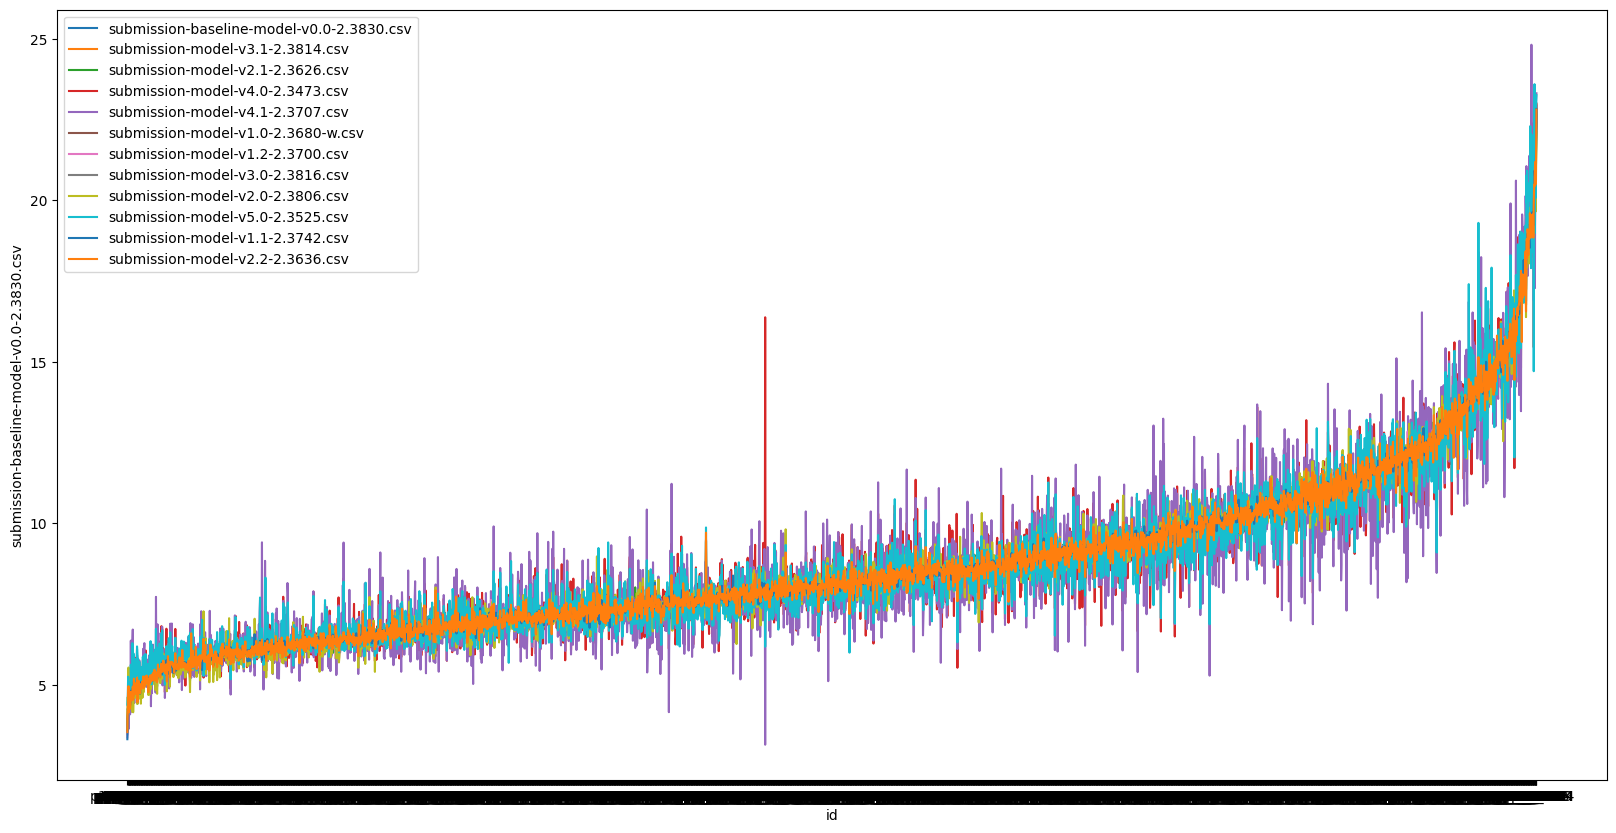

In [19]:
# display all data in one chart

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
for f in files:
    sns.lineplot(data=merged_data, x='id', y=f, label=f)

plt.show()



count    3644.000000
mean        0.007491
std         0.422172
min        -2.504880
25%        -0.208265
50%         0.007584
75%         0.208792
max         3.769403
Name: diff, dtype: float64


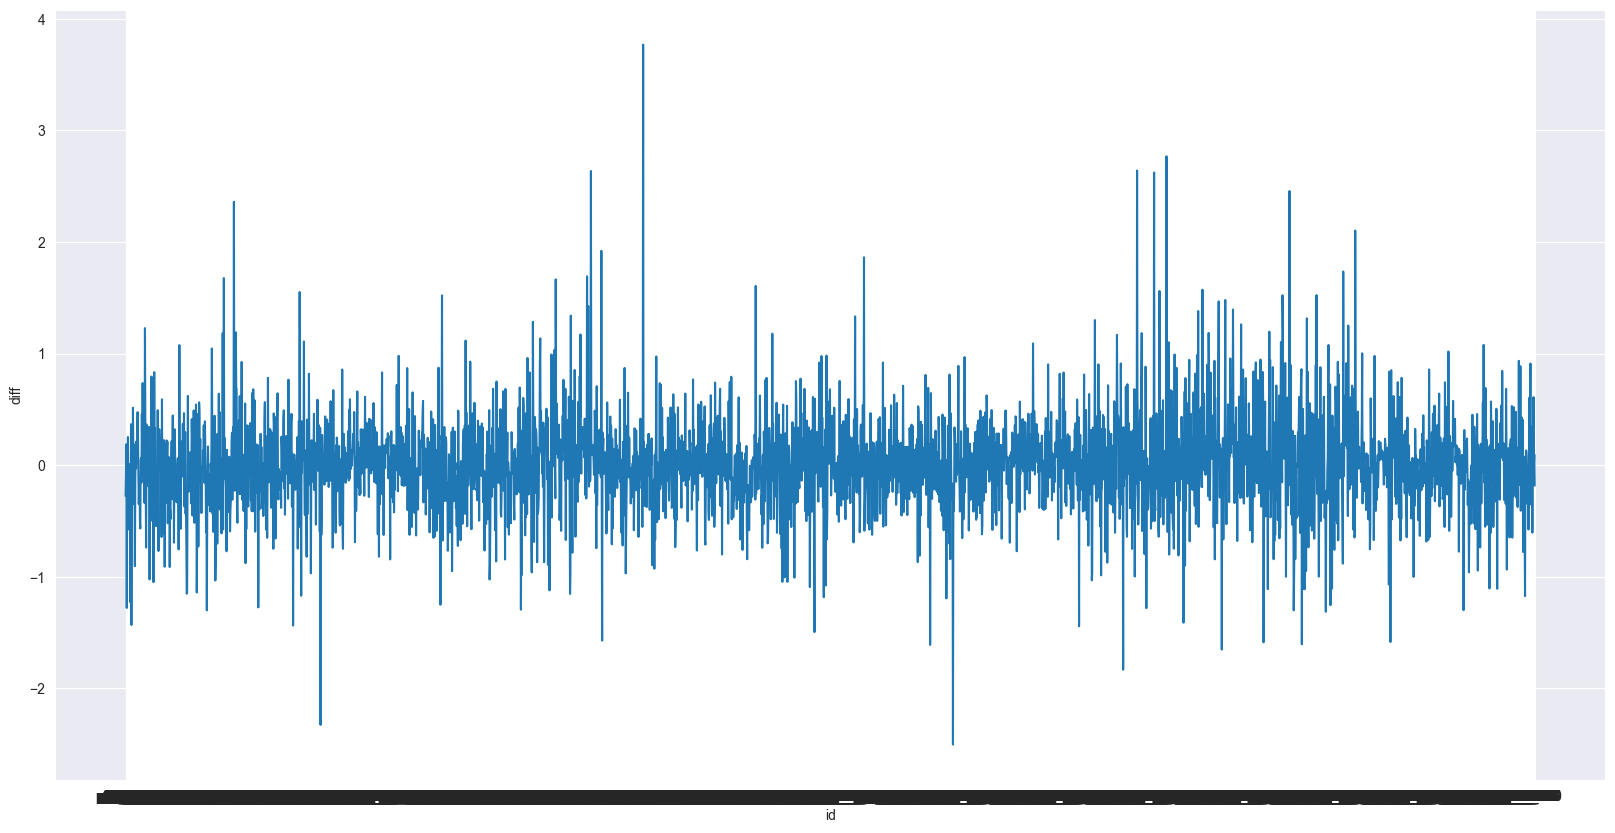

In [47]:
files = [
    #'submission-model-v4.0-2.3473.csv',
    'submission-model-v4.0-copy.csv',
    'submission-model-v4.0-copy-2.csv'
    #'submission-model-v5.0-2.3525.csv',
    #'submission-2024-11-28_14-58-11-model-v4.1-DNN.csv'
    #'submission-model-v4.1-2.3707.csv',
]

path = '.'

data = {}
for f in files:
    data[f] = pd.read_csv(os.path.join(path, f))

merged_data = data[files[0]]
merged_data = merged_data.rename(columns={'bg+1:00': files[0]})

for f in files[1:]:
    data[f] = data[f].rename(columns={'bg+1:00': f})
    merged_data = pd.merge(merged_data, data[f], on='id')
    
merged_data['diff'] = merged_data[files[0]] - merged_data[files[1]]

print(merged_data['diff'].describe())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.lineplot(data=merged_data, x='id', y='diff')
plt.show()
    

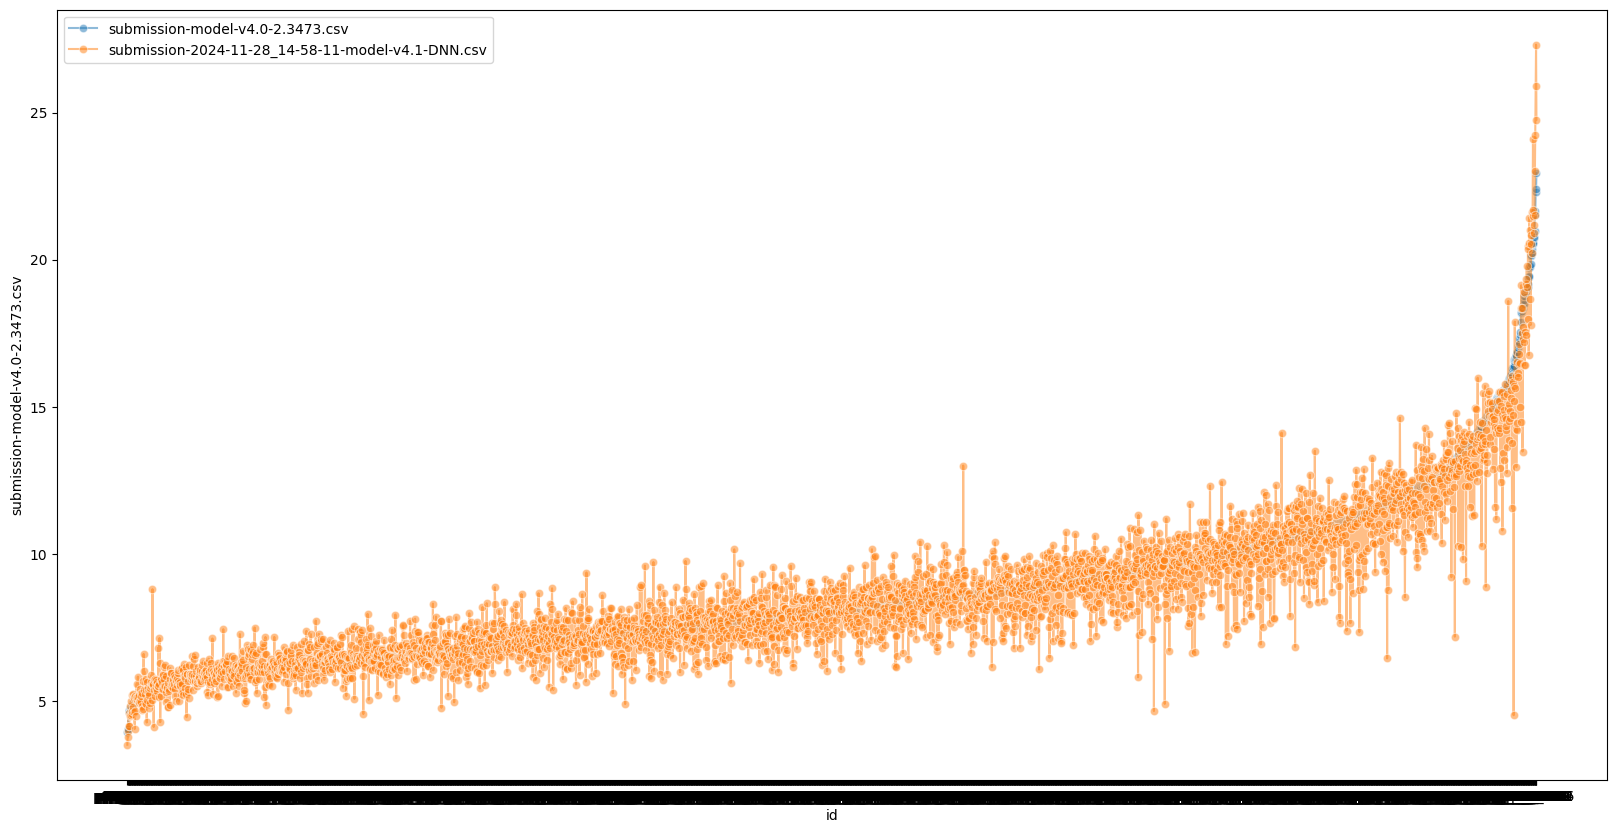

In [42]:

path = '.'

data = {}
for f in files:
    data[f] = pd.read_csv(os.path.join(path, f))

merged_data = data[files[0]]
merged_data = merged_data.rename(columns={'bg+1:00': files[0]})

for f in files[1:]:
    data[f] = data[f].rename(columns={'bg+1:00': f})
    merged_data = pd.merge(merged_data, data[f], on='id')
    
merged_data = merged_data.sort_values(by=files[0])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
for f in files:
    sns.lineplot(data=merged_data, x='id', y=f, label=f, marker='o', alpha=0.5)

plt.show()



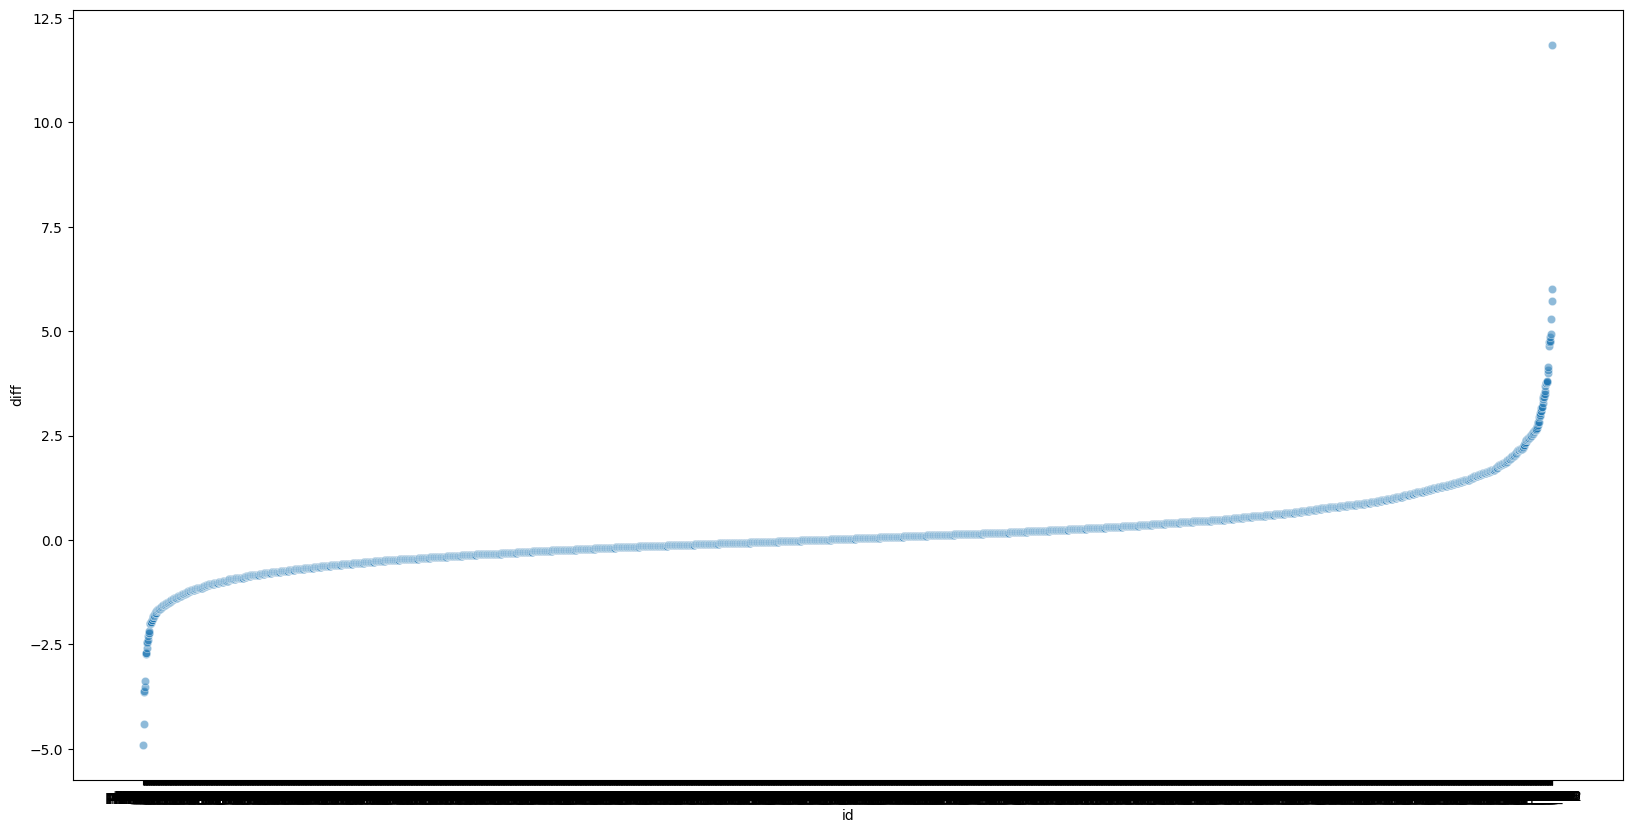

In [43]:
# plot difference between two models
plt.figure(figsize=(20, 10))

merged_data['diff'] = merged_data[files[0]] - merged_data[files[1]]
merged_data = merged_data.sort_values(by='diff')

#sns.lineplot(data=merged_data, x='id', y='diff', alpha=0.5)
sns.scatterplot(data=merged_data, x='id', y='diff', alpha=0.5)

plt.show()